In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Abiyoso\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


## Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [4]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handle Missing Value

In [6]:
df.isnull().sum() # Hitung jumlah missing value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Tidak terdapat missing value pada datafame ✅

## Output jenis value pada column PaymentMethod

In [8]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Frekuensi tiap column dari tiap value column churn

In [9]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## Visualisasi Distribusi Data column TotalCharges

In [10]:
df = df.drop(df[df['TotalCharges']==" "].index)

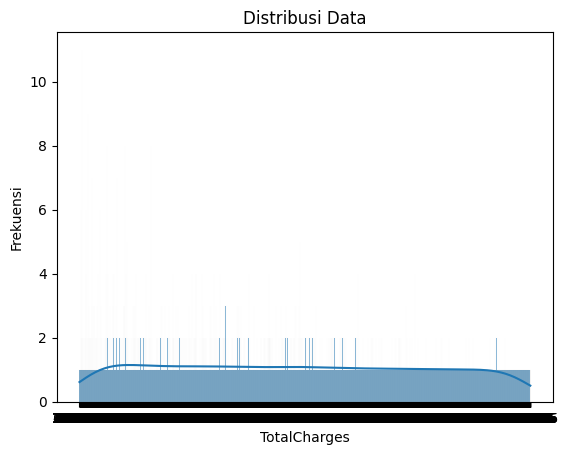

In [12]:
kategori_counts = df['Churn'].value_counts()
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.xlabel('TotalCharges')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

## Visualisasi Distribusi Data column TotalCharges

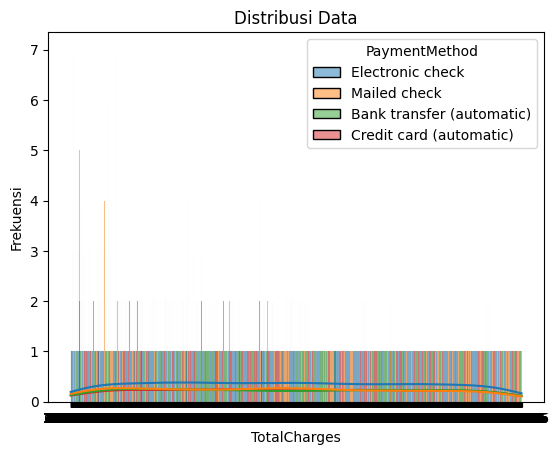

In [13]:
sns.histplot(df[['TotalCharges', 'PaymentMethod']], x='TotalCharges', hue='PaymentMethod', kde=True, bins=30)
plt.xlabel('TotalCharges')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

## Visualisasi Distribusi Bar Plot column Churn

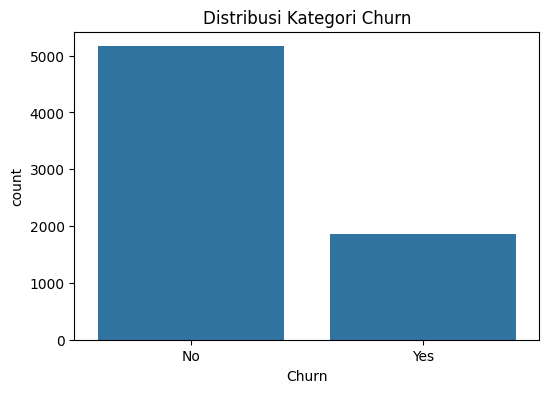

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn")

plt.title("Distribusi Kategori Churn")
plt.show()

## Distribusi Data Pie Chart column Churn

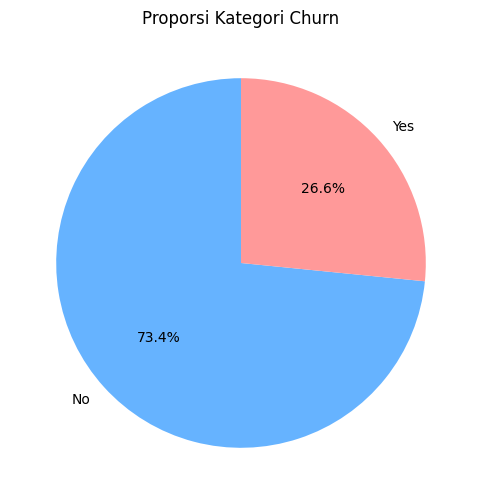

In [15]:
kategori_counts = df["Churn"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"], startangle=90)
plt.title("Proporsi Kategori Churn")
plt.show()

## Distribusi Data Box Plot TotalCharges

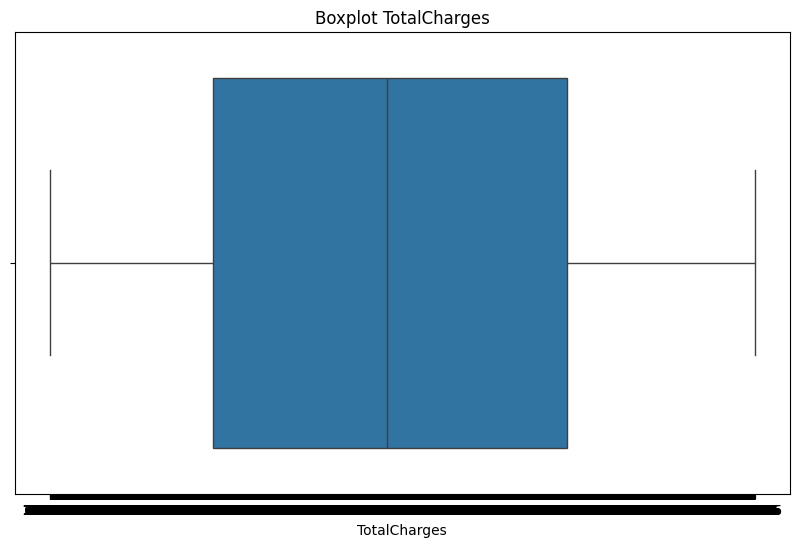

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot TotalCharges')
plt.show()

## Visualisasi Box Plor column TotalCharges berdasarkan Contract

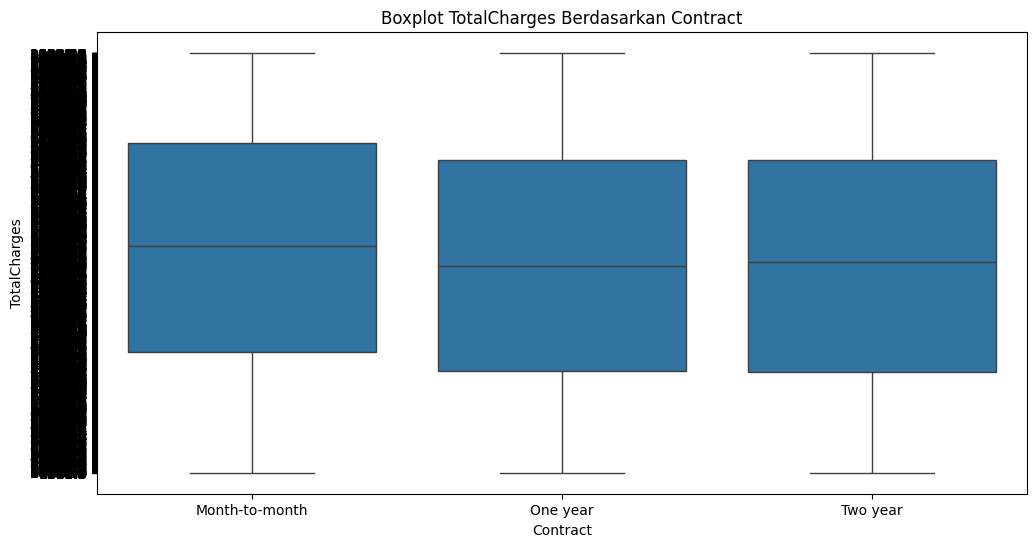

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='TotalCharges', data=df)
plt.title('Boxplot TotalCharges Berdasarkan Contract')
plt.show()

## Plotline column TotalCharges

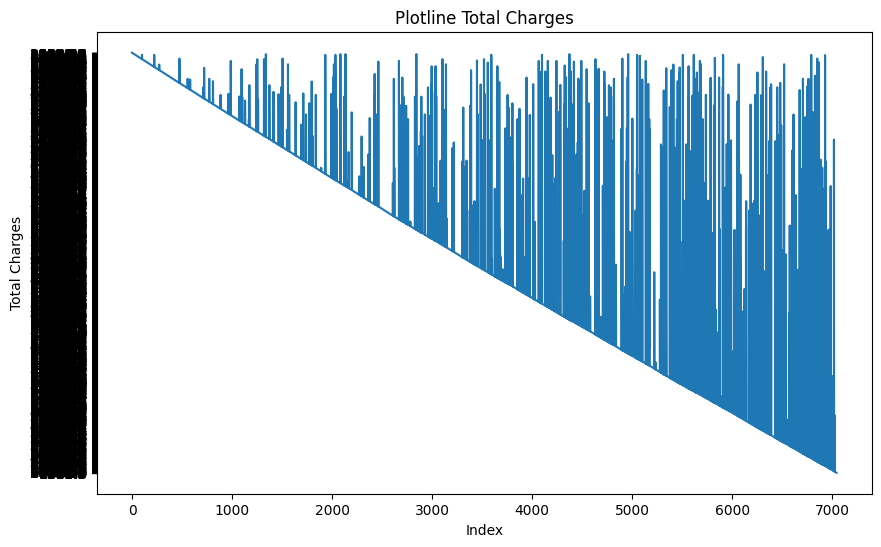

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='TotalCharges', data=df)
plt.title('Plotline Total Charges')
plt.xlabel('Index')
plt.ylabel('Total Charges')
plt.show()

## Plotline column TotalCharges dengan garisnya berdasarkan kategori Contract

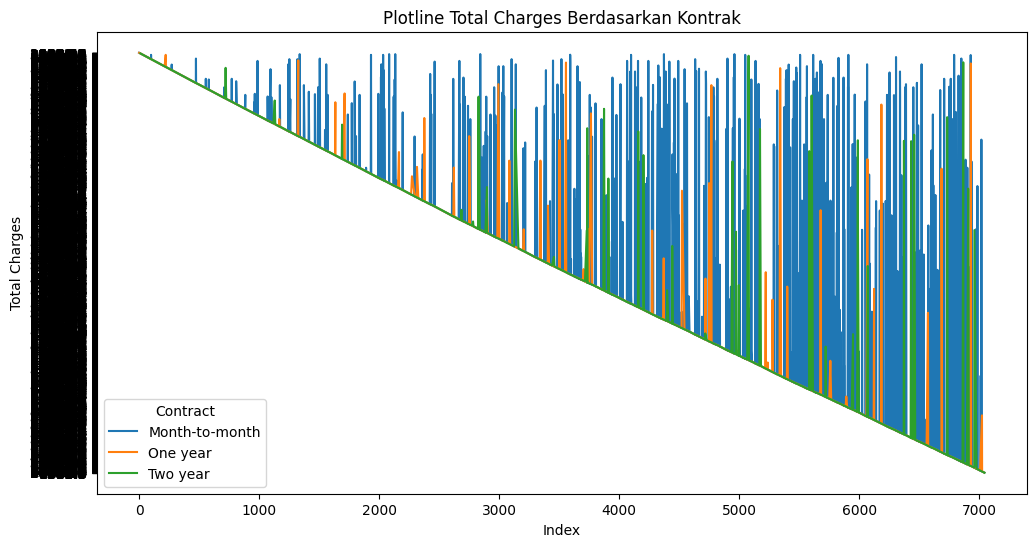

In [19]:
import matplotlib.pyplot as plt
# berikan plotline untuk kolom TotalCharges dengan garisnya berdasarkan kategori contract
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='TotalCharges', hue='Contract', data=df)
plt.title('Plotline Total Charges Berdasarkan Kontrak')
plt.xlabel('Index')
plt.ylabel('Total Charges')
plt.show()

## Visualisasi Persebaran TotalCharges vs MonthlyCharges

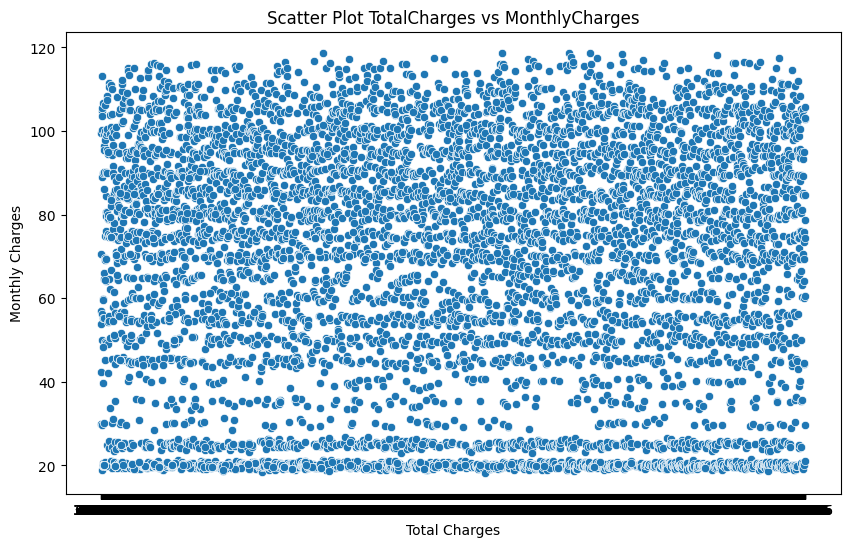

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df)
plt.title('Scatter Plot TotalCharges vs MonthlyCharges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()

## Visualisasi Persebaran TotalCharges vs MonthlyCharges berdasarkan kategori Contract

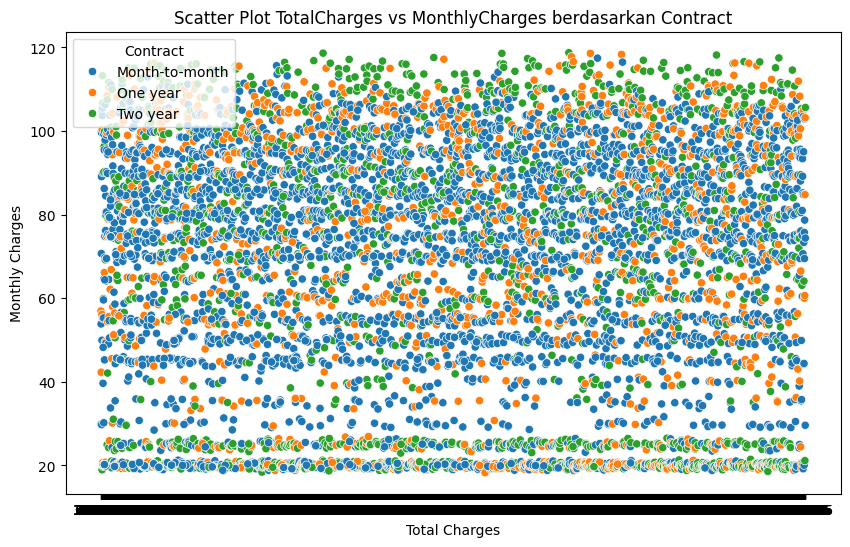

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Contract', data=df)
plt.title('Scatter Plot TotalCharges vs MonthlyCharges berdasarkan Contract')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()